In [70]:
import pandas as pd
import numpy as np

In [71]:
s3_url = "s3://genius-lyrics-dataset/merged_dataset.csv"
df = pd.read_csv(s3_url, encoding= 'ISO-8859-1')

In [72]:
# Raw Data
df.head()

,Unnamed: 0,title,image_text,selftext,author,subreddit,created_utc,upvote_ratio,num_comments,permalink,url,label
0,0,Family of Armed Robbery Suspect Outraged Pizza...,Following the shooting death of 28-year-old ar...,NaN,NYPD-32,WhitePeopleTwitter,1480870334,0.68,21,/r/whitepeopletwitter/comments/5ggakpv/Family_...,https://www.reddit.com/r/whitepeopletwitter/co...,1
1,1,Hurricane Irma likely to drop to Category 4 up...,(Reuters) - Hurricane Irma is likely to be dow...,NaN,NYPD-32,fakenews,1480870334,0.67,21,/r/fakenews/comments/5ggakps/Hurricane_Irma_likel,https://www.reddit.com/r/fakenews/comments/5gg...,0
2,2,Factbox: Trump on Twitter (July 26) - U.S. Mil...,The following statementsÊwere posted to the ve...,NaN,NYPD-32,fakenews,1480870334,0.67,21,/r/fakenews/comments/5ggakpq/Factbox:_Trump_on_Tw,https://www.reddit.com/r/fakenews/comments/5gg...,0
3,3,Senior Saudi prince freed in settlement agreem...,DUBAI (Reuters) - Senior Saudi Prince Miteb bi...,NaN,NYPD-32,fakenews,1480870334,0.68,21,/r/fakenews/comments/5ggakpn/Senior_Saudi_prince_,https://www.reddit.com/r/fakenews/comments/5gg...,0
4,4,WATCH: REMEMBER WHEN HILLARY SAID She WasnÕt D...,"That Hillary, she sure is a forked-tongued sil...",NaN,NYPD-32,WhitePeopleTwitter,1480870334,0.68,21,/r/whitepeopletwitter/comments/5ggakpl/WATCH:_...,https://www.reddit.com/r/whitepeopletwitter/co...,1


In [73]:
df.shape

(71537, 12)

In [74]:
df.isna().sum()

Unnamed: 0          0
title               0
image_text        749
selftext        53658
author              0
subreddit           0
created_utc         0
upvote_ratio        0
num_comments        0
permalink           0
url                 0
label               0
dtype: int64

In [75]:
# dropping the null values
df.dropna(subset=['image_text'], inplace = True)

In [76]:
# concatenating title and image_text
df.loc[:, 'concatenated'] = df.title + ' ' + df.image_text

In [77]:
df.concatenated

0        Family of Armed Robbery Suspect Outraged Pizza...
1        Hurricane Irma likely to drop to Category 4 up...
2        Factbox: Trump on Twitter (July 26) - U.S. Mil...
3        Senior Saudi prince freed in settlement agreem...
4        WATCH: REMEMBER WHEN HILLARY SAID She WasnÕt D...
                               ...                        
71532    The Hillary Era is Coming: Worry! Photo by Ven...
71533    TurkeyÕs Suspicious Mind-Set Has Been a Centur...
71534    This Is What Happens When You Elect Climate Ch...
71535    SHOCKING VIDEO Shows How Easily Islamic Terror...
71536    CNN HOST And Crybaby Hillary Surrogate Get BRU...
Name: concatenated, Length: 70788, dtype: object

In [78]:
df.columns

Index(['Unnamed: 0', 'title', 'image_text', 'selftext', 'author', 'subreddit',
       'created_utc', 'upvote_ratio', 'num_comments', 'permalink', 'url',
       'label', 'concatenated'],
      dtype='object')

In [79]:
imp_variables = df[['concatenated', 'label', 'upvote_ratio']]

In [80]:
imp_variables.head()

,concatenated,label,upvote_ratio
0,Family of Armed Robbery Suspect Outraged Pizza...,1,0.68
1,Hurricane Irma likely to drop to Category 4 up...,0,0.67
2,Factbox: Trump on Twitter (July 26) - U.S. Mil...,0,0.67
3,Senior Saudi prince freed in settlement agreem...,0,0.68
4,WATCH: REMEMBER WHEN HILLARY SAID She WasnÕt D...,1,0.68


In [81]:
# Counting the no_of_words in each concatenated column
imp_variables.loc[:, 'no_of_words'] = imp_variables.concatenated.apply(lambda x: x.count(" "))

/var/folders/ws/tmqw3bw90s1gt_qpctyr0fxw0000gn/T/ipykernel_31719/496236214.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imp_variables.loc[:, 'no_of_words'] = imp_variables.concatenated.apply(lambda x: x.count(" "))


In [82]:
diction = set(str(imp_variables.concatenated))
diction

{'\n',
 ' ',
 '!',
 '(',
 ')',
 ',',
 '-',
 '.',
 '0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 ':',
 'A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'Y',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'r',
 's',
 't',
 'u',
 'w',
 'x',
 'y',
 'z',
 'Õ'}

In [83]:
# Replacing new line with spaces
imp_variables.loc[:, 'concatenated'] = imp_variables.concatenated.apply(lambda x: x.replace("\n", " "))

In [84]:
imp_variables.head()

,concatenated,label,upvote_ratio,no_of_words
0,Family of Armed Robbery Suspect Outraged Pizza...,1,0.68,477
1,Hurricane Irma likely to drop to Category 4 up...,0,0.67,249
2,Factbox: Trump on Twitter (July 26) - U.S. Mil...,0,0.67,242
3,Senior Saudi prince freed in settlement agreem...,0,0.68,85
4,WATCH: REMEMBER WHEN HILLARY SAID She WasnÕt D...,1,0.68,174


In [85]:
import re

def preProcess(input_string):
    # Define a regular expression pattern for matching text inside square brackets
    pattern1 = re.compile(r'\[.*?\]')
    # Define a regular expression pattern for removing special characters
    pattern2 = re.compile(r'[^A-Za-z0-9\s]')
    
    # Use sub() function to replace the matched pattern with an empty string
    brackettext_remove = re.sub(pattern1, '', input_string)

    # strip spaces from start and end
    stripped = brackettext_remove.strip()

    # convert the string to lower
    to_lower = stripped.lower()

    # remove special characters from the string
    final_text = re.sub(pattern2, '', to_lower)
    
    return final_text

imp_variables.loc[:, 'concatenated'] = imp_variables.concatenated.apply(preProcess)

In [86]:
# After PreProcessing
imp_variables.head()

,concatenated,label,upvote_ratio,no_of_words
0,family of armed robbery suspect outraged pizza...,1,0.68,477
1,hurricane irma likely to drop to category 4 up...,0,0.67,249
2,factbox trump on twitter july 26 us military ...,0,0.67,242
3,senior saudi prince freed in settlement agreem...,0,0.68,85
4,watch remember when hillary said she wasnt dro...,1,0.68,174


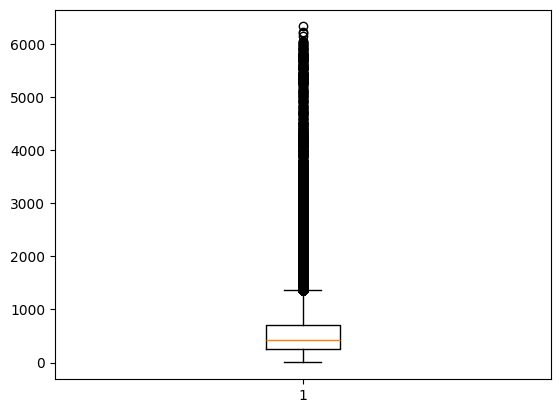

In [87]:
import matplotlib.pyplot as plt

plt.boxplot(imp_variables.no_of_words)
plt.show()

In [88]:
import pandas as pd
import nltk
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import gensim.downloader as api
import spacy

def transform_text(text):
    # Tokenization
    tokens = word_tokenize(text)

    # Remove stop words
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word.lower() not in stop_words]

    # Stemming
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(word) for word in tokens]

    return " ".join(tokens)

imp_variables.loc[:, 'processed_text'] = imp_variables['concatenated'].map(transform_text)

/var/folders/ws/tmqw3bw90s1gt_qpctyr0fxw0000gn/T/ipykernel_31719/3511410649.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imp_variables.loc[:, 'processed_text'] = imp_variables['concatenated'].map(transform_text)


In [89]:
# After Transformation
imp_variables.head()

,concatenated,label,upvote_ratio,no_of_words,processed_text
0,family of armed robbery suspect outraged pizza...,1,0.68,477,famili arm robberi suspect outrag pizza hut em...
1,hurricane irma likely to drop to category 4 up...,0,0.67,249,hurrican irma like drop categori 4 upon landfa...
2,factbox trump on twitter july 26 us military ...,0,0.67,242,factbox trump twitter juli 26 us militari tran...
3,senior saudi prince freed in settlement agreem...,0,0.68,85,senior saudi princ freed settlement agreement ...
4,watch remember when hillary said she wasnt dro...,1,0.68,174,watch rememb hillari said wasnt drop 2008 prim...


'hurricane irma likely to drop to category 4 upon landfall in florida nhc reuters  hurricane irma is likely to be downgraded to a category 4 storm by the time it makes landfall in florida the us national hurricane center said on thursday irma at present a category 5 storm packing maximum sustained winds of 180 miles 285 km per hour is moving off the northern coast of the dominican republic the nhc said   it has become a little less organized over the past few hours but the threat of direct hurricane impacts in florida over the weekend and early next week continues to increase it said hurricane watches were in effect for the northwestern bahamas and much of cuba irma one of the most powerful atlantic storms in a century killed eight people on the caribbean island of saint martin and left barbuda devastated on thursday meanwhile a hurricane swirling in the gulf of mexico katia which is about 195 miles 310 km northeast of veracruz with maximum sustained winds of 80 miles per hour 130 km per hour is likely to gain near major hurricane strength by landfall the nhc said a third hurricane in the atlantic jose has strengthened slightly and is expected to intensify further over the next 48 hours it added hurricane jose is about 815 miles 1310 km east of the lesser antilles with maximum sustained winds of 90 miles per hour 150 km per hour the miamibased weather forecaster said'

'hurricane irma likely to drop to category 4 upon landfall in florida nhc reuters  hurricane irma is likely to be downgraded to a category 4 storm by the time it makes landfall in florida the us national hurricane center said on thursday irma at present a category 5 storm packing maximum sustained winds of 180 miles 285 km per hour is moving off the northern coast of the dominican republic the nhc said   it has become a little less organized over the past few hours but the threat of direct hurricane impacts in florida over the weekend and early next week continues to increase it said hurricane watches were in effect for the northwestern bahamas and much of cuba irma one of the most powerful atlantic storms in a century killed eight people on the caribbean island of saint martin and left barbuda devastated on thursday meanwhile a hurricane swirling in the gulf of mexico katia which is about 195 miles 310 km northeast of veracruz with maximum sustained winds of 80 miles per hour 130 km per hour is likely to gain near major hurricane strength by landfall the nhc said a third hurricane in the atlantic jose has strengthened slightly and is expected to intensify further over the next 48 hours it added hurricane jose is about 815 miles 1310 km east of the lesser antilles with maximum sustained winds of 90 miles per hour 150 km per hour the miamibased weather forecaster said'

In [90]:
from sklearn.model_selection import train_test_split

# Split the data into train, and test sets (80-20)
X_train, X_test, y_train, y_test = train_test_split(imp_variables.processed_text, imp_variables.label, test_size=0.2, random_state=42)

In [91]:
import time
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import classification_report, confusion_matrix,f1_score, accuracy_score

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

import pickle

In [92]:
# Count Vectorization 
count_vectorizer = CountVectorizer(max_features=5000)
count_vectorizer.fit(imp_variables['processed_text'])

X_train_count_matrix = count_vectorizer.transform(X_train)
# X_val_count_matrix = count_vectorizer.transform(X_val)
X_test_count_matrix = count_vectorizer.transform(X_test)

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
tfidf_vectorizer.fit(imp_variables['processed_text'])

X_train_tfidf_matrix = tfidf_vectorizer.transform(X_train)
# X_val_tfidf_matrix = tfidf_vectorizer.transform(X_val)
X_test_tfidf_matrix = tfidf_vectorizer.transform(X_test)

In [93]:
save_models_path = 'pickles/'
# version = str(round(time.time(), 0))

In [94]:
import seaborn as sns

def evaluateModel(predictions):
    # Evaluate the model
    accuracy = accuracy_score(y_test, predictions)
    classification_rep = classification_report(y_test, predictions)
    conf_matrix = confusion_matrix(y_test, predictions)

    # Display evaluation metrics
    print("Accuracy:", accuracy)
    print("\nClassification Report:\n", classification_rep)
    print("\nConfusion Matrix:\n", conf_matrix)
    sns.heatmap(conf_matrix/np.sum(conf_matrix), annot=True, fmt='.2%', cmap='Blues')

In [95]:
X_train_count_matrix.get_shape()

(56630, 5000)

### SVM

Accuracy: 0.9427178980081933

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.94      0.94      7098
           1       0.94      0.95      0.94      7060

    accuracy                           0.94     14158
   macro avg       0.94      0.94      0.94     14158
weighted avg       0.94      0.94      0.94     14158


Confusion Matrix:
 [[6642  456]
 [ 355 6705]]


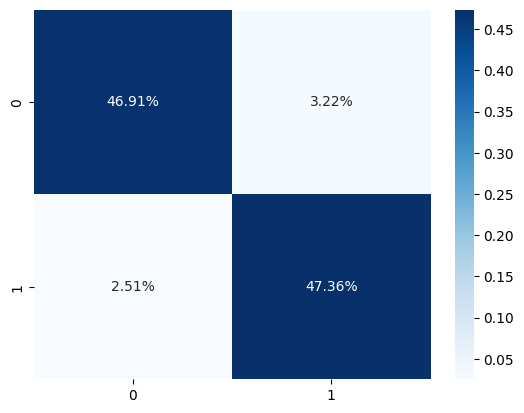

In [106]:
model_name = 'CountVectorizerSVM.pkl'

# Create an SVM model
cm_svm_model = SVC(kernel='linear', random_state=42)

# Train the model
cm_svm_model.fit(X_train_count_matrix, y_train)

# Make predictions on the test set
cm_svm_predictions = cm_svm_model.predict(X_test_count_matrix)

evaluateModel(cm_svm_predictions)

pickle.dump(cm_svm_model, open(save_models_path+model_name,'wb'))

Accuracy: 0.9559966096906343

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.95      0.96      7098
           1       0.95      0.96      0.96      7060

    accuracy                           0.96     14158
   macro avg       0.96      0.96      0.96     14158
weighted avg       0.96      0.96      0.96     14158


Confusion Matrix:
 [[6752  346]
 [ 277 6783]]


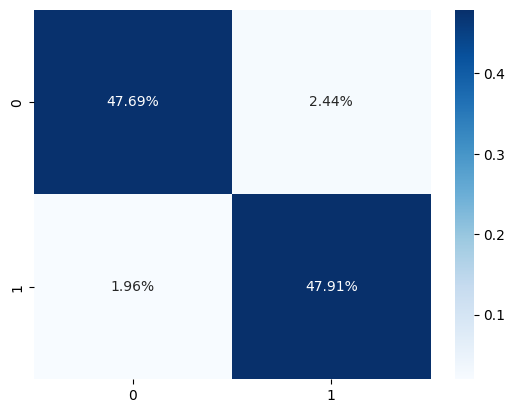

In [97]:
model_name = 'TfIDFVectorizerSVM.pkl'

# Create an SVM model
tm_svm_model = SVC(kernel='linear', random_state=42)

# Train the model
tm_svm_model.fit(X_train_tfidf_matrix, y_train)

# Make predictions on the test set
tm_svm_predictions = tm_svm_model.predict(X_test_tfidf_matrix)

evaluateModel(tm_svm_predictions)

pickle.dump(tm_svm_model, open(save_models_path+model_name,'wb'))

### LogisticRegression

Accuracy: 0.9492866224042944

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.94      0.95      7098
           1       0.94      0.95      0.95      7060

    accuracy                           0.95     14158
   macro avg       0.95      0.95      0.95     14158
weighted avg       0.95      0.95      0.95     14158


Confusion Matrix:
 [[6702  396]
 [ 322 6738]]


/Users/reddy/opt/anaconda3/envs/reddit/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


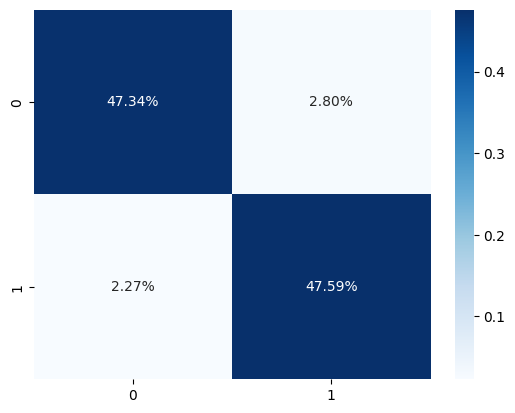

In [98]:
model_name = 'CountVectorizerLR.pkl'

# Create a Logistic Regression model
cm_logistic_model = LogisticRegression(random_state=42)

# Train the model
cm_logistic_model.fit(X_train_count_matrix, y_train)
# Make predictions on the test set
cm_log_predictions = cm_logistic_model.predict(X_test_count_matrix)

evaluateModel(cm_log_predictions)

pickle.dump(cm_logistic_model, open(save_models_path+model_name,'wb'))

Accuracy: 0.9468851532702359

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.94      0.95      7098
           1       0.94      0.95      0.95      7060

    accuracy                           0.95     14158
   macro avg       0.95      0.95      0.95     14158
weighted avg       0.95      0.95      0.95     14158


Confusion Matrix:
 [[6684  414]
 [ 338 6722]]


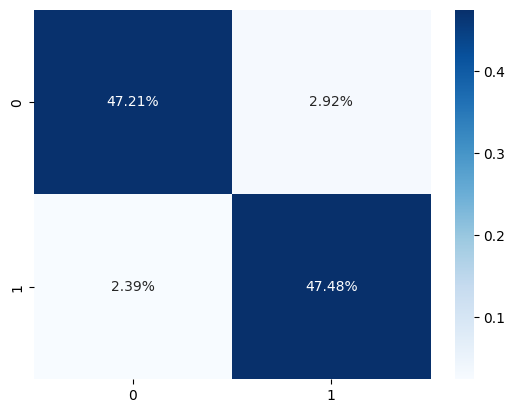

In [99]:
model_name = 'TfIDFVectorizerLR.pkl'

# Create a Logistic Regression model
tm_logistic_model = LogisticRegression(random_state=42)

# Train the model
tm_logistic_model.fit(X_train_tfidf_matrix, y_train)

# Make predictions on the test set
tm_log_predictions = tm_logistic_model.predict(X_test_tfidf_matrix)
evaluateModel(tm_log_predictions)

pickle.dump(tm_logistic_model, open(save_models_path+model_name,'wb'))

### Decision Tree

Accuracy: 0.935937279276734

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.92      0.94      7098
           1       0.93      0.95      0.94      7060

    accuracy                           0.94     14158
   macro avg       0.94      0.94      0.94     14158
weighted avg       0.94      0.94      0.94     14158


Confusion Matrix:
 [[6561  537]
 [ 370 6690]]


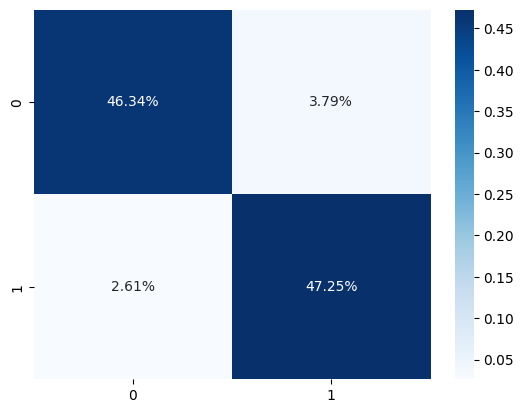

In [100]:
model_name = 'CountVectorizeDT.pkl'

cm_dt_model = DecisionTreeClassifier(random_state=42)
cm_dt_model.fit(X_train_count_matrix, y_train)
cm_dt_predictions = cm_dt_model.predict(X_test_count_matrix)

evaluateModel(cm_dt_predictions)

pickle.dump(cm_dt_model, open(save_models_path+model_name,'wb'))

Accuracy: 0.6472665630738805

Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.67      0.66      7098
           1       0.65      0.62      0.64      7060

    accuracy                           0.65     14158
   macro avg       0.65      0.65      0.65     14158
weighted avg       0.65      0.65      0.65     14158


Confusion Matrix:
 [[4776 2322]
 [2672 4388]]


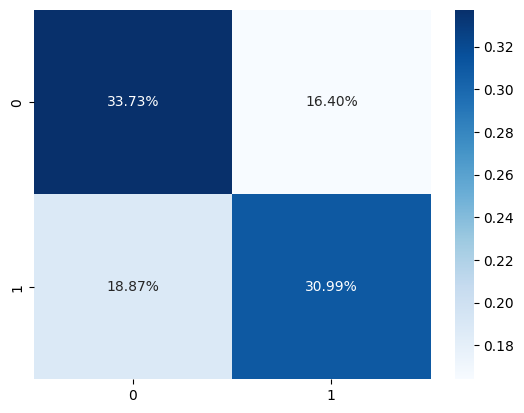

In [101]:
model_name = 'TfidfVectorizeDT.pkl'

tm_dt_model = DecisionTreeClassifier(random_state=42)
tm_dt_model.fit(X_train_tfidf_matrix, y_train)
tm_dt_predictions = tm_dt_model.predict(X_test_tfidf_matrix)

evaluateModel(tm_dt_predictions)

pickle.dump(tm_dt_model, open(save_models_path+model_name,'wb'))

### Random Forest

Accuracy: 0.9583980788246927

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.95      0.96      7098
           1       0.95      0.97      0.96      7060

    accuracy                           0.96     14158
   macro avg       0.96      0.96      0.96     14158
weighted avg       0.96      0.96      0.96     14158


Confusion Matrix:
 [[6746  352]
 [ 237 6823]]


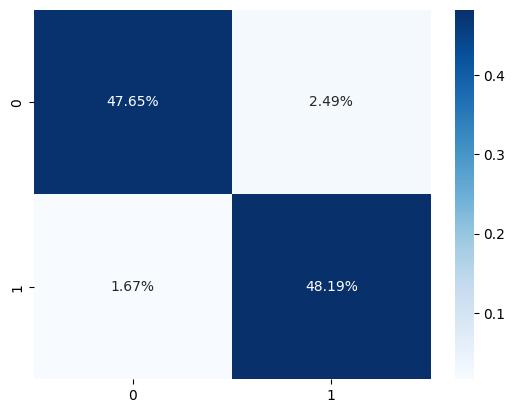

In [102]:
model_name = 'CountVectorizerRF.pkl'

cm_rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
cm_rf_model.fit(X_train_count_matrix, y_train)
cm_rf_predictions = cm_rf_model.predict(X_test_count_matrix)

evaluateModel(cm_rf_predictions)

pickle.dump(cm_rf_model, open(save_models_path+model_name,'wb'))


Accuracy: 0.9574092385930216

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.94      0.96      7098
           1       0.95      0.97      0.96      7060

    accuracy                           0.96     14158
   macro avg       0.96      0.96      0.96     14158
weighted avg       0.96      0.96      0.96     14158


Confusion Matrix:
 [[6706  392]
 [ 211 6849]]


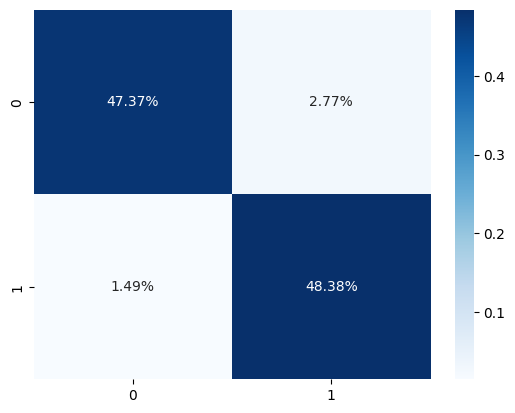

In [103]:
model_name = 'TfidfVectorizerRF.pkl'

tm_rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
tm_rf_model.fit(X_train_tfidf_matrix, y_train)
tm_rf_predictions = tm_rf_model.predict(X_test_tfidf_matrix)

evaluateModel(tm_rf_predictions)

pickle.dump(tm_rf_model, open(save_models_path+model_name,'wb'))


### Naive Bayes

Accuracy: 0.8228563356406272

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.78      0.82      7098
           1       0.80      0.86      0.83      7060

    accuracy                           0.82     14158
   macro avg       0.83      0.82      0.82     14158
weighted avg       0.83      0.82      0.82     14158


Confusion Matrix:
 [[5554 1544]
 [ 964 6096]]


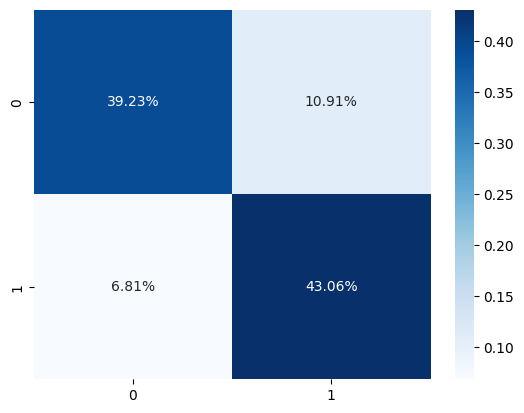

In [104]:
from sklearn.naive_bayes import GaussianNB

model_name = 'CountVectorizerNB.pkl'

cm_nb_model = GaussianNB()

cm_nb_model.fit(X_train_count_matrix.toarray(), y_train)
cm_nb_predictions = cm_nb_model.predict(X_test_count_matrix.toarray())

evaluateModel(cm_nb_predictions)

pickle.dump(cm_nb_model, open(save_models_path+model_name,'wb'))

Accuracy: 0.8345105240853228

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.83      0.83      7098
           1       0.83      0.84      0.84      7060

    accuracy                           0.83     14158
   macro avg       0.83      0.83      0.83     14158
weighted avg       0.83      0.83      0.83     14158


Confusion Matrix:
 [[5864 1234]
 [1109 5951]]


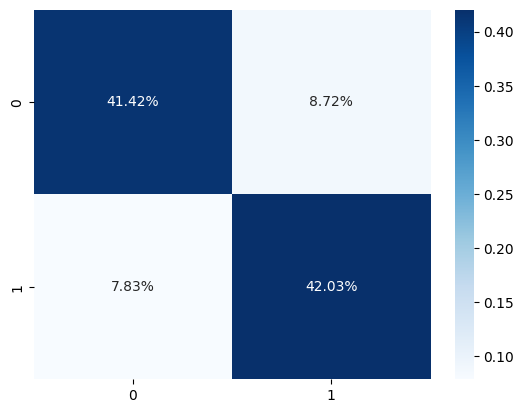

In [105]:
model_name = 'TfidfVectorizerNB.pkl'

tm_nb_model = GaussianNB()

tm_nb_model.fit(X_train_tfidf_matrix.toarray(), y_train)
tm_nb_predictions = tm_nb_model.predict(X_test_tfidf_matrix.toarray())

evaluateModel(tm_nb_predictions)

pickle.dump(tm_nb_model, open(save_models_path+model_name,'wb'))